# Pytorch basic machine learning sample

Required libraries must be defined to build our pytorch `nn` modules

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import torch
from torch import nn # nn contains all of pytorxh's building blocks to develop neural networks
import matplotlib.pyplot as plt

# checking for version
torch.__version__


'2.1.0+cu118'

## 1. Data (preparing and loading)

Data can be almost anything.. in machine learning

* Excel speadsheet
* Images of any kind
* Videos
* Audio like songs or podcasts
* DNA
* Text

Machine learning is a game of two parts :
1. Get data into numerical representation
2. Build a model to learn patterns inthat numerical representation


In [4]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# create
start =0
end =1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias

print(f"x 0 to 10 :\n {X[:10]}")
print(f"\ny 0 to 10 with weight * bias:\n {y[:10]}")
print(f"\nlen x  : {len(X)}")
print(f"len y: {len(y)}")

x 0 to 10 :
 tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])

y 0 to 10 with weight * bias:
 tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])

len x  : 50
len y: 50


### Splitting data into training and test sets (one of the most important concepts in machine learning in general)

In [5]:
# create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data ?

This is where the data explorer's motto comes in!

"Visualize,visaulize,visualize"

In [6]:
def plot_predictions(train_data= X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize= (10,7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=10, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=10, label="Test data")

  # Are there any predictions ?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=15, label="Predictions")

  # Show the legend
  plt.legend(prop={"size":14});

In [ ]:
plot_predictions();

## 2. Build Model
Our PyTorch model!

What our model does:

* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

How does it so ?

1. Gradient descent
2. Backpropagation

In [7]:
# Create linear regression model class
class LİnearRegressionModel(nn.Module): # <- almost everything in PyTorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  # Forward method to define the computation in the model
  def forward(self, x:torch.Tensor) -> torch.Tensor: # <- "x" is the input data
    return self.weights * x + self.bias # this is the linear regression formula

### PyTorch model building essentials
* `torch.nn` - contains all of the buildings for computational graphs (a neural network can be considered a computational graph)
* `torch.nn`, often a PyTorch layer from torch.nn will set these for us
* `torch.nn.Module` - The base class for all neural network modules, if you subclass it, you should overwrite `forward()` method ;)
* torch.optim - this where the optimizers in PyTorch live, they will help with gradient descent
* `def forward()` - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

if you want to learn more about `torch.nn`, [follow the link](https://pytorch.org/docs/stable/nn.html)

### Checking the contents of our PyTorch model

Now we've created a model, let's see what's inside...

So we can chack our model parameters or what's inside our model using `.parameters `

In [8]:
# Create a random seed
torch.manual_seed(42)

#create an instance of the model (this is a subclass of ...Module)
model_0 = LİnearRegressionModel()

# check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [9]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`

When we pass data through our model, it's going to run it through the `forward()` method.

In [10]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [11]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [12]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

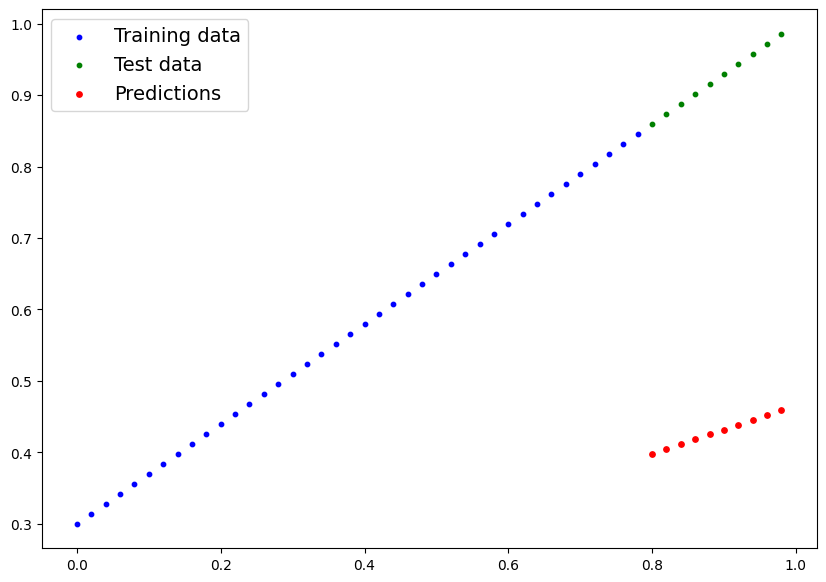

In [13]:
plot_predictions(predictions=y_preds)

## 3. Train model

The whole idea of training is for a model to move from some unknown parameters (these may be random) to some known parameters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models predictions are is to use a loss function.

* Note: Loss function may also be called cost function or criterion in
different areas.

Things we need to train:

* **Loss function** A function to measure how wrong our model's  predictions are to the ideal outputs, lower is better. To know more about loss function - [follow the link](https://pytorch.org/docs/stable/nn.html#loss-functions)
* **Optimizers** Takes into account the loss of a model and adjust the model's parameters (e.g. wight & bias) to improve the loss function. To know more about optimizers - [follow the link](https://pytorch.org/docs/stable/optim.html#optimizer-step)
** Inside the optimizer you'll often have to set two parameters:
>* `params` - the model parameters you'd like to optimize, for example `params=model_0.parameters()`
>* `lr` (learning rate) - the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step a small `lr` results in small changes, a large `lr` resylts in large changes

And specifically for PyTorch, we need:
* A training loop
* A testing loop


In [14]:
# Setup a loss function
loss_fn = nn.L1Loss()

# setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr = 0.01) # lr = learning rate = one of the most important hyperparameter we can set

**which loss function and optimizer should we use ?**

For a regression problem (like we developing), a loss function of `nn.L1loss()` and optimizer like `torch.optim.SGD()` will suffice.

But for a classification problem like classifying whether a photo is of a dog or a cat, usually a loss function of `nn.BCELoss()` is used (binary cross entropy loss)

### Building a training loop in pytorch

A couple of things we need in a training loop:
1. Loop through the data
2. Forward pass (this involves data moving through our model's `forward()` functions) to make predictions on data - also called forward propagation
3. Calculate the loss (compare forward pass predictions to ground thruth labels)
4. Optimizer zero grad
5. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)
6. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)


In [15]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [16]:
torch.manual_seed(42)

# An epoch is one loop through the data... (this is a hyperparameter that we set it ourselves)
epochs = 100

### Training
# 0. Loop through the data
for epoch in range(epochs):
  # set the model to training mode
  model_0.train() # train mode in pytorch sets all parameters that require gradients to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)
  print(f"loss: {loss}")

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will acculumate through the loop so... we have to zero them above in step 3 for the next iteration of the loop

  ### Testing
  model_0.eval() #turns off different settings in the model not needed for evaluation/testing
  with torch.inference_mode(): # turns off gradient tracking
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  # Print out epoch, loss and test loss every 10th loop
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
    # Print out model state_dict()
    print(f"model state_dict: {model_0.state_dict()}")

loss: 0.31288138031959534
Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
model state_dict: OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
loss: 0.3013603389263153
loss: 0.28983935713768005
loss: 0.2783183455467224
loss: 0.26679736375808716
loss: 0.2552763521671295
loss: 0.24375534057617188
loss: 0.23223432898521423
loss: 0.22071333229541779
loss: 0.20919232070446014
loss: 0.1976713240146637
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
model state_dict: OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
loss: 0.18615034222602844
loss: 0.1746293306350708
loss: 0.16310831904411316
loss: 0.1515873372554779
loss: 0.14006635546684265
loss: 0.1285453587770462
loss: 0.11702437698841095
loss: 0.1060912236571312
loss: 0.09681284427642822
loss: 0.08908725529909134
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
model state_dict: OrderedDict([('weights', tensor([0.4184])), ('bias',

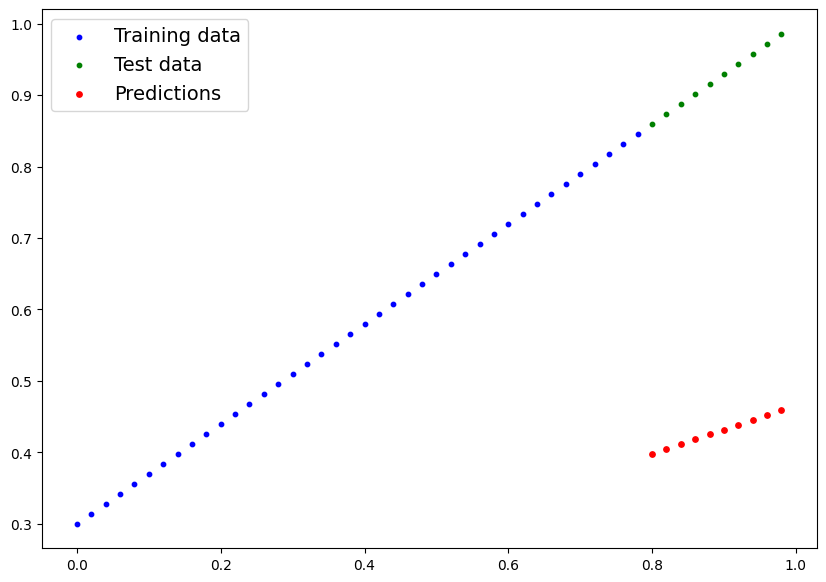

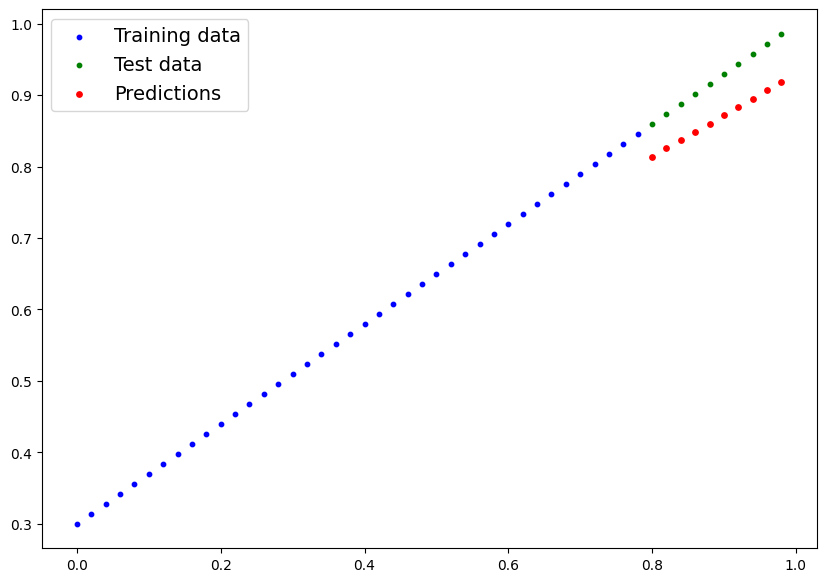

In [17]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

plot_predictions(predictions=y_preds)
plot_predictions(predictions=y_preds_new)

##4. Saving a model in PyTorch

There are three main methods you should about for saving and loading models in PyTorch.

1. `torch.save()` - allows you save a PyTorch abject in python's pckle format
2. `torch.load()` - allows you load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary

In [18]:
# saving our PyTorch model
from pathlib import Path

SAVED_FILE_NAME = "<your path here.pth>"

#torch.save(obj=model_0.state_dict(),
#           f= SAVED_FILE_NAME)

In [19]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

##5.  Loading a PyTorch model

Since we saved our model's `state_dict()` rather the entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that

In [20]:
# To load in saved state_dict() we have to instantiate a new instance of our model class
loaded_model = LİnearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model.load_state_dict(torch.load(f=SAVED_FILE_NAME))

<All keys matched successfully>

In [21]:
loaded_model.state_dict(), model_0.state_dict()

(OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))]),
 OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))]))

In [22]:
# Maje some predictions with our loaded model
loaded_model.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model(X_test)

loaded_model_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

##6. Putting it all together

We are giong back through the steps above and see it all in one place (we are gonna use `gpu` at this time :) )


In [24]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.1.0+cu118'

Create device-agnostic code.

If we've got access to a GPU, our code will use it (for potentially faster computing). If no, the code will default to using CPU

In [7]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [8]:
!nvidia-smi

Fri Oct 27 19:53:22 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### 6.1 Data

In [9]:
# Create some data using the linear regression formula of y = weight * X + bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# create X and y (features and labels)

X = torch.arange(start,end,step).unsqueeze(dim = 1) # without unsqueeze errors will pop up
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [10]:
# split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

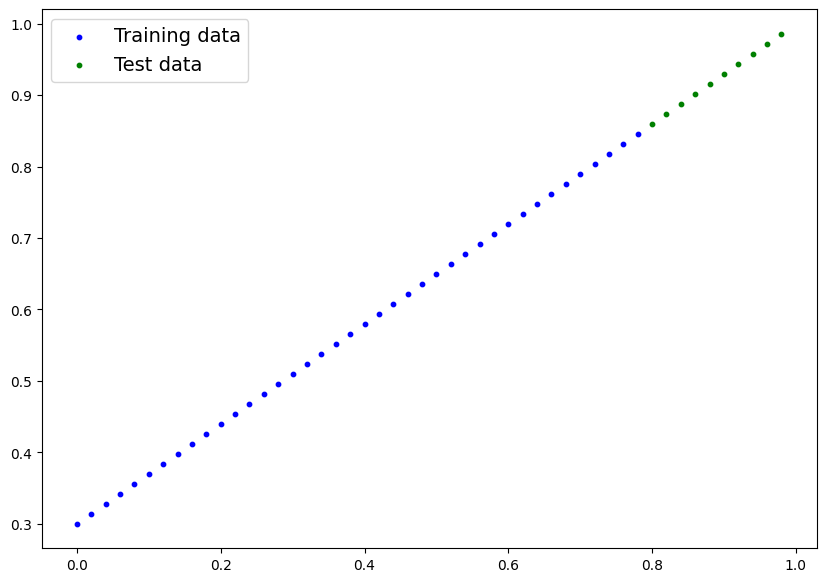

In [11]:
# Plot the data
# Note: if you don't have the plot_predictions() function, this will error
plot_predictions(X_train,y_train, X_test, y_test)

### 6.2 Building a PyTorch Linear model

In [12]:
# create a linear model ny subclassing nn. Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters
    self.linear_layer =  nn.Linear(in_features=1,
                                   out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [13]:
# Chech the model current device (important!!!)
next(model_1.parameters()).device

device(type='cpu')

In [14]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.3 Training

For training we need:
* Loss function
* Optimizer
* Training loop
* Testing loop


In [15]:
# setup loss function
loss_fn = nn.L1Loss() # same as MAE

# setup our optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [16]:
### Training loop
torch.manual_seed(42)

# Put our datas an the target device (device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)


epochs = 200

for epoch in range(epochs):
  model_1.train()

  # 1. forward pass
  y_pred = model_1(X_train)

  # 2. Calcullate the loss
  loss = loss_fn(y_pred,y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred,y_test)

  # Print out epoch, loss and test loss every 10th loop

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")



Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 10 | Loss: 0.439968079328537 | Test loss: 0.4392664134502411
Epoch: 20 | Loss: 0.3247582018375397 | Test loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954833924770355 | Test loss: 0.16984669864177704
Epoch: 40 | Loss: 0.09433845430612564 | Test loss: 0.03513690456748009
Epoch: 50 | Loss: 0.023886388167738914 | Test loss: 0.04784907028079033
Epoch: 60 | Loss: 0.019956795498728752 | Test loss: 0.045803118497133255
Epoch: 70 | Loss: 0.016517987474799156 | Test loss: 0.037530567497015
Epoch: 80 | Loss: 0.013089174404740334 | Test loss: 0.02994490973651409
Epoch: 90 | Loss: 0.009653178043663502 | Test loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215683650225401 | Test loss: 0.014086711220443249
Epoch: 110 | Loss: 0.00278724217787385 | Test loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 130 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416

### 6.4 Making and evaluating predictions

In [20]:
# turn model into evaluating mode
model_1.eval()

# make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

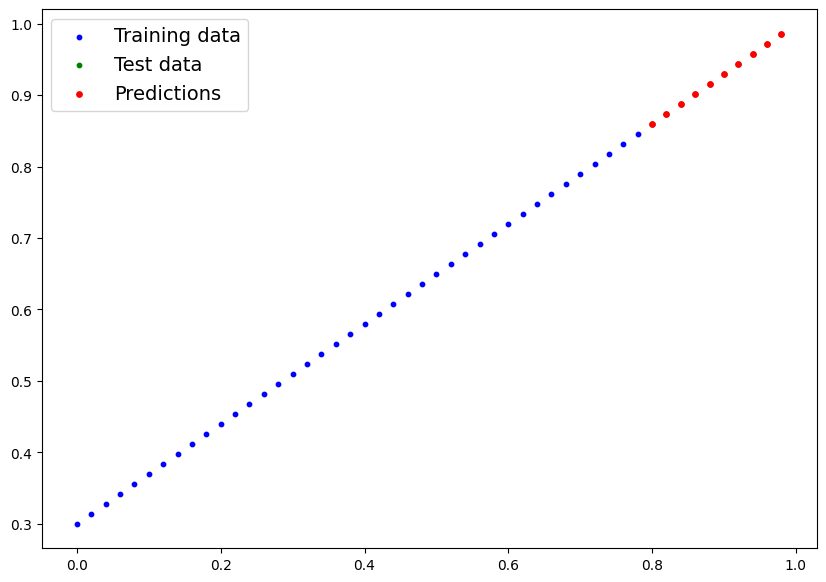

In [23]:
# Check out our model predictions visually
plot_predictions(predictions=y_preds.cpu()) # pyplot is based on CPU and now our y_pred tensor is stored on GPU. So we are converting GPU tensor to a CPU numpy format


### 6.5 Saving & loading a trained model

In [25]:
from pathlib import Path

# create models directory

SAVED_FILE_NAME_1 = "your path here .pth"

print(f"Saving model to: {SAVED_FILE_NAME_1}")
torch.save(obj=model_1.state_dict(),
           f = SAVED_FILE_NAME_1)

Saving model to: /content/drive/MyDrive/Colabs/Saved_PyTorch_models/GPU_based_model_1.pth


In [26]:
# Load a PyTorch model

# Create a new instance of linear regression model v2
loaded_model_1 = LinearRegressionModelV2()

# load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(SAVED_FILE_NAME_1))

# put the loaded model to device
loaded_model_1.to(device)


LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [29]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [31]:
loaded_model_1.state_dict(), model_1.state_dict()

(OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
              ('linear_layer.bias', tensor([0.3025], device='cuda:0'))]),
 OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
              ('linear_layer.bias', tensor([0.3025], device='cuda:0'))]))

In [32]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')